In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
from wrangle import wrangle_zillow
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 1.Load your zillow dataset.

In [73]:
df=wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [74]:
# renaming columns for convienience
df=df.rename(columns={'bedroomcnt':'bed','bathroomcnt':'bath','taxvaluedollarcnt':'estimate','calculatedfinishedsquarefeet':'sq_foot','taxamount':'tax'})
df.head(1)

,bed,bath,sq_foot,estimate,yearbuilt,tax,fips
0,4,2.0,3633,296425,2005,6941.39,6037


In [75]:
# splitting the data into train, validate and test sample. All the exploration will be done on  unscaled train data sample only
train_and_validate, test = train_test_split(df,test_size=.2 ,random_state=123)
train, validate = train_test_split(train_and_validate,test_size=.3,random_state=123)

In [76]:
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [77]:
train.head()

,bed,bath,sq_foot,estimate,yearbuilt,tax,fips
410426,3,2.0,1550,357034,1961,4418.72,6037
533217,3,3.5,1800,287774,1996,2798.18,6059
695362,3,2.0,1542,588738,1923,7210.51,6037
729442,3,1.0,1128,290984,1952,3622.02,6037
524897,0,1.0,396,34541,1942,579.61,6037


# 2.Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [80]:
train.drop(columns=['bed','bath','yearbuilt','tax','fips'],inplace=True)
train.head()

,sq_foot,estimate
410426,1550,357034
533217,1800,287774
695362,1542,588738
729442,1128,290984
524897,396,34541


In [86]:
X_train= train[['sq_foot']]
y_train= train['estimate']

X_validate = validate[['sq_foot']]
y_validate = validate['estimate']

X_test =test[['sq_foot']]
y_test =test['estimate']

In [87]:
# create a baseline using mean of our target variable
baseline = round(train.estimate.mean(),2)
baseline

train['baseline']= baseline
train.head()



,sq_foot,estimate,baseline
410426,1550,357034,398734.95
533217,1800,287774,398734.95
695362,1542,588738,398734.95
729442,1128,290984,398734.95
524897,396,34541,398734.95


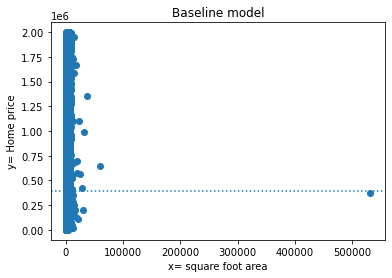

In [88]:
# scatterplot
plt.scatter(train.sq_foot, train.estimate)
plt.axhline(train.estimate.mean(), ls = ':')
plt.xlabel('x= square foot area')
plt.ylabel('y= Home price')
plt.title('Baseline model');

In [89]:
#create a regression model(ols= ordinary least squares) and fit it into train data sample


lr = LinearRegression().fit(X_train,y_train)
predictions= lr.predict(X_train)


In [90]:
# train['yhat'] = predictions


# make prediction
train['yhat'] = lr.predict(X_train)
train.head()

,sq_foot,estimate,baseline,yhat
410426,1550,357034,398734.95,357264.612498
533217,1800,287774,398734.95,399104.649483
695362,1542,588738,398734.95,355925.731315
729442,1128,290984,398734.95,286638.630067
524897,396,34541,398734.95,164131.001774


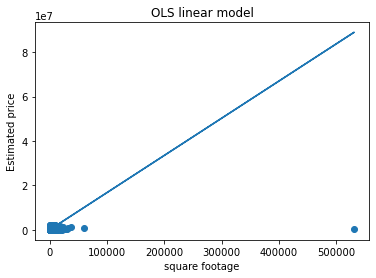

In [99]:
# visualize the line of best fit from OLS linear model
plt.scatter(train['sq_foot'], train['estimate'])
plt.plot(train.sq_foot, train.yhat)
plt.xlabel('square footage')
plt.ylabel('Estimated price')
plt.title('OLS linear model');

# 3.Plot the residuals for the linear regression model that you made.



In [104]:
train['residual'] = train['yhat'] - train['estimate']
train['residual_baseline'] = train['baseline'] - df['estimate']
train.head()



,sq_foot,estimate,baseline,yhat,residual,residual_baseline
410426,1550,357034,398734.95,357264.612498,230.612498,41700.95
533217,1800,287774,398734.95,399104.649483,111330.649483,110960.95
695362,1542,588738,398734.95,355925.731315,-232812.268685,-190003.05
729442,1128,290984,398734.95,286638.630067,-4345.369933,107750.95
524897,396,34541,398734.95,164131.001774,129590.001774,364193.95


Text(0.5, 1.0, 'Baseline Residuals Model')

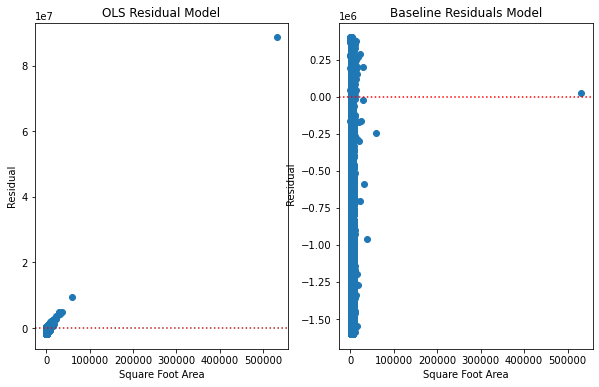

In [106]:
# residual plots
plt.figure(figsize=(10,6))
# create subplots
plt.subplot(121)
plt.scatter(train.sq_foot, train['residual'])
plt.axhline(y=0, ls =':', color = 'firebrick')
plt.xlabel('Square Foot Area')
plt.ylabel('Residual')
plt.title('OLS Residual Model')

plt.subplot(122)
plt.scatter(train.sq_foot, train.residual_baseline)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Foot Area')
plt.ylabel(' Residual')
plt.title('Baseline Residuals Model')



## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
# and
## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [107]:
train['residual^2']= train['residual'] ** 2
train['baseline_residual ^2'] = (train['residual_baseline'] ** 2)
train.head()

,sq_foot,estimate,baseline,yhat,residual,residual_baseline,residual^2,baseline_residual ^2
410426,1550,357034,398734.95,357264.612498,230.612498,41700.95,5.318212e+04,1.738969e+09
533217,1800,287774,398734.95,399104.649483,111330.649483,110960.95,1.239451e+10,1.231233e+10
695362,1542,588738,398734.95,355925.731315,-232812.268685,-190003.05,5.420155e+10,3.610116e+10
729442,1128,290984,398734.95,286638.630067,-4345.369933,107750.95,1.888224e+07,1.161027e+10
524897,396,34541,398734.95,164131.001774,129590.001774,364193.95,1.679357e+10,1.326372e+11


In [113]:
# sum of squared error = SSE
SSE= train['residual^2'].sum()
SSE_baseline= train['baseline_residual ^2'].sum()
print(f'SSE ={(SSE)} and SSE_baseline= {(SSE_baseline)}')


SSE =8.6976467113804e+16 and SSE_baseline= 1.154642336922085e+17


In [115]:
#calculating MSE
MSE= SSE/len(train)
MSE_baseline= SSE_baseline/ len(train)

print(f'MSE ={MSE}')
print(f'MSE_baseline ={MSE_baseline}')


MSE =74150885118.41264
MSE_baseline =98437835105.37262


In [121]:
# calculate RMSE
from math import sqrt
RMSE= sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print(f'RMSE={RMSE}\nRMSE_baseline= {RMSE_baseline}')

RMSE=272306.6013125878
RMSE_baseline= 313748.0439865285


# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [123]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
        print('Baseline Model performs better than OLS Regression Model')

OLS Regression Model Performs Better than Baseline


# 7. What is the amount of variance explained in your model?

In [125]:
from sklearn.metrics import r2_score
r2_score(train.estimate, train.yhat)

0.24672373138805914

In [126]:
#calculate MSE using sklearn
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train.estimate, train.yhat)
MSE2_baseline = mean_squared_error(train.estimate, train.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 74150885118.41264
MSE baseline 98437835105.37262


In [128]:
#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')


RMSE2 = mean_squared_error(train.estimate, train.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train.estimate, train.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 272306.6013125878
RMSE baseline 313748.0439865285


# 8.Is your model better than the baseline model?



In [130]:
import statsmodels.api as sm

X2 = sm.add_constant(train.sq_foot)
est = sm.OLS(train.estimate, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               estimate   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                 3.842e+05
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:10:13   Log-Likelihood:            -1.6344e+07
No. Observations:             1172966   AIC:                         3.269e+07
Df Residuals:                 1172964   BIC:                         3.269e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.786e+04    546.674    179.003      0.0

# 9.Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
      - sum of squared errors (SSE)
      - explained sum of squares (ESS)
      - total sum of squares (TSS)
      - mean squared error (MSE)
      - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false



In [133]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [132]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [131]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline